In [1]:
# install Pint if necessary

try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 4.0 MB/s eta 0:00:00


In [2]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [3]:
# import functions from modsim

from modsim import *

In [4]:
def bike_to_wellesley():
    bikeshare.olin -= 1
    bikeshare.wellesley += 1

In [5]:
def bike_to_wellesley(state):
    state.olin -= 1
    state.wellesley += 1

In [6]:
bikeshare = State(olin=10, wellesley=2)
bike_to_wellesley(bikeshare)

In [7]:
bikeshare1 = State(olin=10, wellesley=2)
bikeshare2 = State(olin=2, wellesley=10)

In [8]:
bike_to_wellesley(bikeshare1)
bike_to_wellesley(bikeshare2)

In [9]:
def bike_to_olin(state):
    """Move one bike from Wellesley to Olin.

    state: bikeshare State object
    """
    # We decrease one state variable and increase the
    # other so the total number of bikes is unchanged.
    state.wellesley -= 1
    state.olin += 1

In [10]:
def bike_to_olin(state):
    if state.wellesley == 0:
        return
    state.wellesley -= 1
    state.olin += 1

In [11]:
bikeshare = State(olin=12, wellesley=0)
bike_to_olin(bikeshare)

In [12]:
show(bikeshare)

,state
olin,12
wellesley,0


In [13]:
x = 5

In [14]:
x == 5

True

In [15]:
if x == 5:
    print('yes, x is 5')

yes, x is 5


In [16]:
def bike_to_olin(state):
    if state.wellesley == 0:
        state.wellesley_empty += 1
        return
    state.wellesley -= 1
    state.olin += 1

In [17]:
bikeshare = State(olin=12, wellesley=0,
                  wellesley_empty=0)

We can test it by calling `bike_to_olin`:

In [18]:
bike_to_olin(bikeshare)

After this update, there should be 12 bikes at Olin, no bikes at Wellesley, and one unhappy customer.

In [19]:
show(bikeshare)

,state
olin,12
wellesley,0
wellesley_empty,1


Looks good!

## Exercises

In [20]:
def run_simulation(state, p1, p2, num_steps):
    """Simulate the given number of time steps.

    state: State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    num_steps: number of time steps
    """
    results = TimeSeries()
    results[0] = state.olin

    for i in range(num_steps):
        step(state, p1, p2)
        results[i+1] = state.olin

    results.plot(label='Olin')
    decorate(title='Olin-Wellesley Bikeshare',
             xlabel='Time step (min)',
             ylabel='Number of bikes')

In [21]:
def step(state, p1, p2):
    """Simulate one time step.

    state: bikeshare State object
    p1: probability of an Olin->Wellesley ride
    p2: probability of a Wellesley->Olin ride
    """
    if flip(p1):
        bike_to_wellesley(state)

    if flip(p2):
        bike_to_olin(state)

In [22]:
def bike_to_olin(state):
    """Move one bike from Wellesley to Olin.

    state: bikeshare State object
    """
    if state.wellesley == 0:
        state.wellesley_empty += 1
        return
    state.wellesley -= 1
    state.olin += 1

In [23]:
def bike_to_wellesley(state):
    """Move one bike from Olin to Wellesley.

    state: bikeshare State object
    """
    state.olin -= 1
    state.wellesley += 1

### Exercise 1

 Modify `bike_to_wellesley` so it checks whether a bike is available at Olin.  If not, it should add `1` to `olin_empty`.

To test it, create a `State` that initializes `olin` and `olin_empty` to `0`, run `bike_to_wellesley`, and check the result.

In [24]:

def bike_to_wellesley(state):
    """Move one bike from Olin to Wellesley.

    state: bikeshare State object
    """
    if state.olin == 0:
        state.olin_empty += 1
        return
    state.olin -= 1
    state.wellesley += 1

In [25]:


bikeshare = State(olin=0, wellesley=12,
                  olin_empty=0, wellesley_empty=0)

In [26]:


bike_to_wellesley(bikeshare)

In [27]:

show(bikeshare)

,state
olin,0
wellesley,12
olin_empty,1
wellesley_empty,0


### Exercise 2

 Now run the simulation with parameters `p1=0.3`, `p2=0.2`, and `num_steps=60`, and confirm that the number of bikes is never negative.

Start with this initial state:

In [28]:
bikeshare = State(olin=10, wellesley=2,
                  olin_empty=0, wellesley_empty=0)

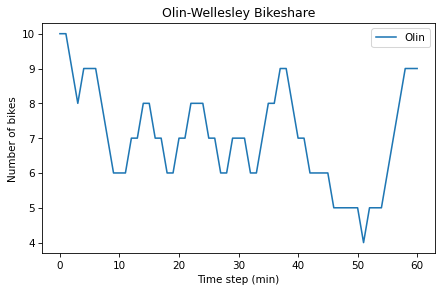

In [29]:
run_simulation(bikeshare, 0.3, 0.2, 60)